In [1]:
import pandas as pd
import numpy as np

# 1. Load data

In [2]:
data = pd.read_csv('Data/CHEMBL3471.csv', sep=';')
data.head(5)

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties
0,CHEMBL172018,NaN,None,463.45,0,1.90,"12, NSC-685597",CC(=O)C1=C(NNC(=O)c2ccccn2)[C@@]2(C)C(=CC1=O)O...,IC50,'=',...,Human immunodeficiency virus type 1 integrase,Human immunodeficiency virus 1,SINGLE PROTEIN,CHEMBL1129975,1,Scientific Literature,J Med Chem,1997,None,NaN
1,CHEMBL56556,NaN,None,282.12,0,0.23,1a,O=P(O)(O)C(O)(Cc1ccccc1)P(=O)(O)O,Inhibition,NaN,...,Human immunodeficiency virus type 1 integrase,Human immunodeficiency virus 1,SINGLE PROTEIN,CHEMBL3112550,1,Scientific Literature,Eur J Med Chem,2014,None,NaN
2,CHEMBL367881,(+)-USNIC ACID,None,344.32,0,2.13,"11, NSC-685596",CC(=O)C1=C(O)C=C2Oc3c(C(C)=O)c(O)c(C)c(O)c3[C@...,Inhibition,'=',...,Human immunodeficiency virus type 1 integrase,Human immunodeficiency virus 1,SINGLE PROTEIN,CHEMBL1129975,1,Scientific Literature,J Med Chem,1997,None,NaN
3,CHEMBL1669246,NaN,None,399.37,0,3.56,8a,COc1ccc2c(c(C(=O)/C=C(\O)C(=O)O)cn2Cc2ccc(F)cc...,IC50,'=',...,Human immunodeficiency virus type 1 integrase,Human immunodeficiency virus 1,SINGLE PROTEIN,CHEMBL1667799,1,Scientific Literature,Eur J Med Chem,2011,None,NaN
4,CHEMBL1669245,NaN,None,427.43,0,4.03,7f,CCOC(=O)/C(O)=C/C(=O)c1cn(Cc2ccc(F)cc2)c2c(OC)...,IC50,'=',...,Human immunodeficiency virus type 1 integrase,Human immunodeficiency virus 1,SINGLE PROTEIN,CHEMBL1667799,1,Scientific Literature,Eur J Med Chem,2011,None,NaN


# 2. Preprocessing

In [1]:
import sys
sys.path.append('./Codebase/Preprocessor')
from Targetcurate import target_curate
from Assaycurate import assay_curate
from Smilecurate import smile_curate

In [5]:
columns = ['Molecule ChEMBL ID', 'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value', 'Standard Units', 'pChEMBL Value', 'Data Validity Comment',
          'Assay Type', 'Assay Description','Assay Organism', 'Assay Variant Mutation','Target Name','Target Organism', 'Document Journal']

df = data[columns]

## 2.1. Target value standardize (Standard)

In [6]:
df['Target Name'].unique()

array(['Human immunodeficiency virus type 1 integrase'], dtype=object)

In [7]:
df['Target Organism'].unique()

array(['Human immunodeficiency virus 1'], dtype=object)

In [8]:
target = target_curate(data =df, target_name_col = 'Target Name', target_name ='Human immunodeficiency virus type 1 integrase', 
                       target_org_col='Target Organism', target_org = 'Human immunodeficiency virus 1',
                            type_col='Standard Type', unit_col='Standard Units', active_col='Standard Value', 
                            relate_col='Standard Relation', type_arg ='IC50',equal_only = False, thresh = 7)
target.curated_fit()

Number of data before target curation: 8979


(8979, 15)

(8979, 15)

Number of data after handle organism and target name: 8979
Number of data after select unit: 7397
HANDLING
Number of data after standardizing: 5720


/home/labhhc/Documents/Workspace/Publication/Y2023/Paper/HIV_IN_Classification/./Preprocessor/Targetcurate.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_big.drop(drop_idx, inplace = True)
/home/labhhc/Documents/Workspace/Publication/Y2023/Paper/HIV_IN_Classification/./Preprocessor/Targetcurate.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_small.drop(drop_idx, inplace = True)


In [9]:
df1 = target.df

## 2.2. Assay

In [10]:
df['Assay Type'].unique()

array(['B', 'F'], dtype=object)

In [11]:
df['Assay Organism'].unique()

array(['Human immunodeficiency virus 1', 'Human immunodeficiency virus',
       'None'], dtype=object)

In [12]:
assay = assay_curate(data=df1, type_col="Assay Type", org_col="Assay Organism",des_col='Assay Description', 
                     type_arg='B', org_arg='Human immunodeficiency virus 1', kw = 'integrase')

assay.curated_fit()

Number of data befor standardizing: 5720
Number of data after choosing assay type: 5624
Number of data after choosing assay organism: 5191
Number of data after curating: 5051


In [13]:
df2 = assay.df
df2.shape

(5051, 16)

## 2.3. Smiles curated

In [14]:
smile = smile_curate(data=df2, smile_col='Smiles', pchem_col='pChEMBL', keep = 'best')
smile.curate()

(3077, 17)


/home/labhhc/Documents/Workspace/Publication/Y2023/Paper/HIV_IN_Classification/./Preprocessor/Smilecurate.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Canonical_Smiles'] = df[smile_col].apply(Chem.CanonSmiles)


In [15]:
df3 = smile.df

In [16]:
df3.head()

,Molecule ChEMBL ID,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,pChEMBL Value,Data Validity Comment,Assay Type,Assay Description,Assay Organism,Assay Variant Mutation,Target Name,Target Organism,Document Journal,pChEMBL,Canonical_Smiles
686,CHEMBL414850,O=C(NCc1ccc(F)cc1)c1nc(N2CCCCS2(=O)=O)c2cccnc2c1O,IC50,'=',0.5,nM,9.30,NaN,B,In vitro concentration required to inhibit the...,Human immunodeficiency virus 1,NaN,Human immunodeficiency virus type 1 integrase,Human immunodeficiency virus 1,J Med Chem,9.301030,O=C(NCc1ccc(F)cc1)c1nc(N2CCCCS2(=O)=O)c2cccnc2c1O
2030,CHEMBL3805182,NC(=O)c1c2c(c(O)c3ncc(Cc4cccc(Cl)c4F)cc13)C(=O...,IC50,'=',0.6,nM,9.22,NaN,B,Inhibition of pseudotype HIV1 integrase strand...,Human immunodeficiency virus 1,NaN,Human immunodeficiency virus type 1 integrase,Human immunodeficiency virus 1,Eur J Med Chem,9.221849,NC(=O)c1c2c(c(O)c3ncc(Cc4cccc(Cl)c4F)cc13)C(=O...
7124,CHEMBL3806067,NC(=O)c1c2c(c(O)c3ncc(Cc4cccc(Cl)c4F)cc13)C(=O...,IC50,'=',0.7,nM,9.15,NaN,B,Inhibition of pseudotype HIV1 integrase strand...,Human immunodeficiency virus 1,NaN,Human immunodeficiency virus type 1 integrase,Human immunodeficiency virus 1,Eur J Med Chem,9.154902,NC(=O)c1c2c(c(O)c3ncc(Cc4cccc(Cl)c4F)cc13)C(=O...
2314,CHEMBL1917873,CC(C)n1c(=O)c(C(=O)NCc2ccc(F)cc2)c(O)c2ncccc21,IC50,'=',1.0,nM,9.00,NaN,B,Inhibition of HIV1 integrase strand transfer b...,Human immunodeficiency virus 1,NaN,Human immunodeficiency virus type 1 integrase,Human immunodeficiency virus 1,Bioorg Med Chem Lett,9.000000,CC(C)n1c(=O)c(C(=O)NCc2ccc(F)cc2)c(O)c2ncccc21
884,CHEMBL204656,COc1cc2c(cc1Cc1cccc(Cl)c1F)c(=O)c(C(=O)O)cn2[C...,IC50,'=',1.8,nM,8.74,NaN,B,Inhibition of HIV1 integrase,Human immunodeficiency virus 1,NaN,Human immunodeficiency virus type 1 integrase,Human immunodeficiency virus 1,Bioorg Med Chem,8.744727,COc1cc2c(cc1Cc1cccc(Cl)c1F)c(=O)c(C(=O)O)cn2[C...


## 2.4. pChEMBL validation

In [17]:
df4 = df3.dropna(subset = 'pChEMBL Value')
df4.shape

(2834, 17)

R2= 0.9999957805427725


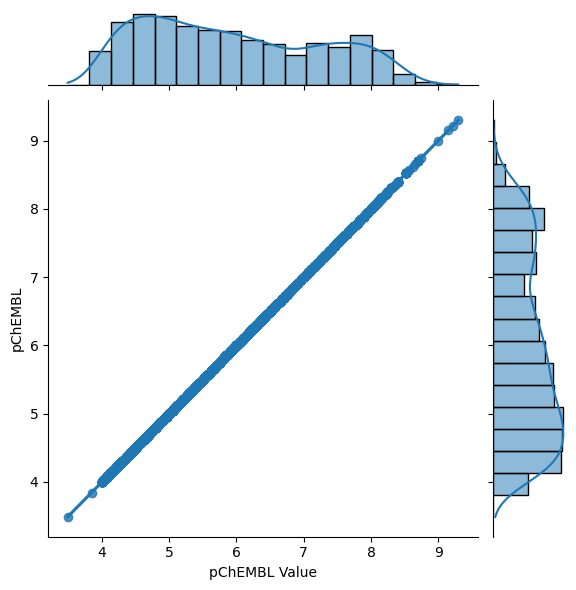

In [18]:
import seaborn as sns
import numpy as np
from scipy import stats
x, y = df4["pChEMBL Value"].values, df4["pChEMBL"].values
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2
r2=stats.pearsonr(x, y)[0] ** 2
print('R2=', r2)

sns.jointplot(data = df4, 
    x = "pChEMBL Value",
    y = "pChEMBL", kind="reg")


## 2.5. Save

In [19]:
df3.to_csv('./Data/CHEMBL3471_pre.csv')
df4.to_csv('./Data/CHEMBL3471_pchem.csv')